In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
diamond_df = pd.read_csv("diamonds.csv",usecols=columns)
diamond_df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
for column in ['cut', 'color', 'clarity']:
    print(f"Value counts for {column}:")
    print(diamond_df[column].value_counts())
    print("\n" + "-"*30 + "\n")

Value counts for cut:
cut
Ideal          21551
Premium        13791
'Very Good'    12082
Good            4906
Fair            1610
Name: count, dtype: int64

------------------------------

Value counts for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

------------------------------

Value counts for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

------------------------------



In [5]:
diamond_df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [6]:
# Checking for missing  values
null_values = diamond_df.isnull().sum()
print("Number of missing values per column:")
print(null_values)

# Checking for duplicates
duplicates = diamond_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
diamond_df.shape

Number of missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Number of duplicate rows: 146


(53940, 10)

In [7]:
# Drop duplicate rows
diamond_df = diamond_df.drop_duplicates()

# Verify the shape after dropping duplicates and missing values
print("After dropping duplicates and missing values:", diamond_df.shape)

After dropping duplicates and missing values: (53794, 10)


In [8]:
diamond_df = diamond_df[(diamond_df['x'] > 0) & (diamond_df['y'] > 0) & (diamond_df['z'] > 0)]
print("After removing rows with zero dimensions:", diamond_df.shape)
diamond_df.describe()

After removing rows with zero dimensions: (53775, 10)


carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

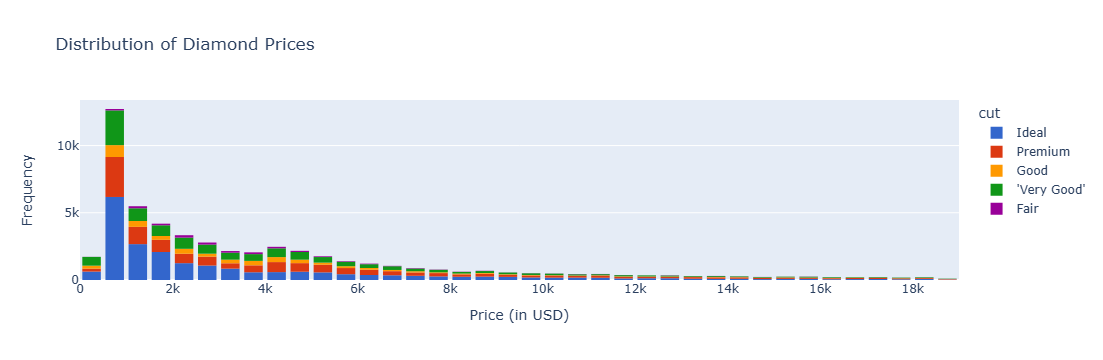

In [9]:
fig = px.histogram(diamond_df, 
                   x='price', 
                   nbins=50, 
                   title='Distribution of Diamond Prices', 
                   color='cut',  
                   color_discrete_sequence=px.colors.qualitative.G10)  

fig.update_layout(xaxis_title='Price (in USD)', yaxis_title='Frequency', bargap=0.2)
fig.show()

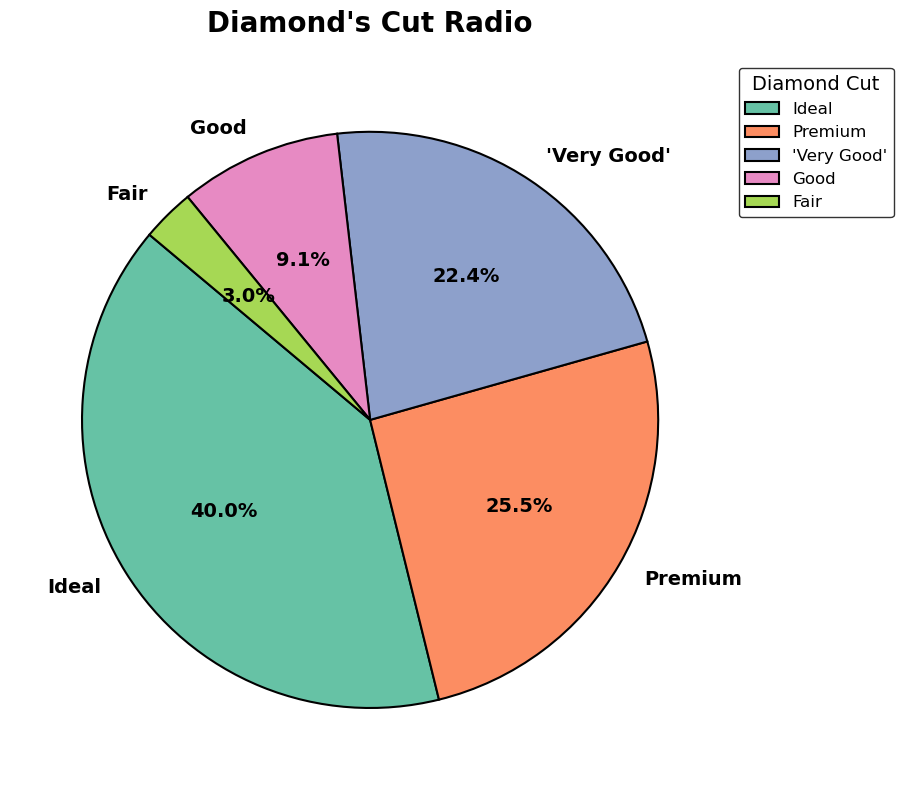

In [10]:
cut_counts = diamond_df['cut'].value_counts()
colors = sns.color_palette("Set2", len(cut_counts))
# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.pie(cut_counts, 
        labels=cut_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},  
        textprops={'fontsize': 14, 'weight': 'bold', 'color': 'black'})  
plt.legend(cut_counts.index, title="Diamond Cut", loc="upper left", fontsize=12, title_fontsize=14, 
           bbox_to_anchor=(1, 1), facecolor="white", edgecolor="black")
plt.title("Diamond's Cut Radio", fontsize=20, weight="bold", color="black", pad=20)

# Show plot
plt.tight_layout() 
plt.show()


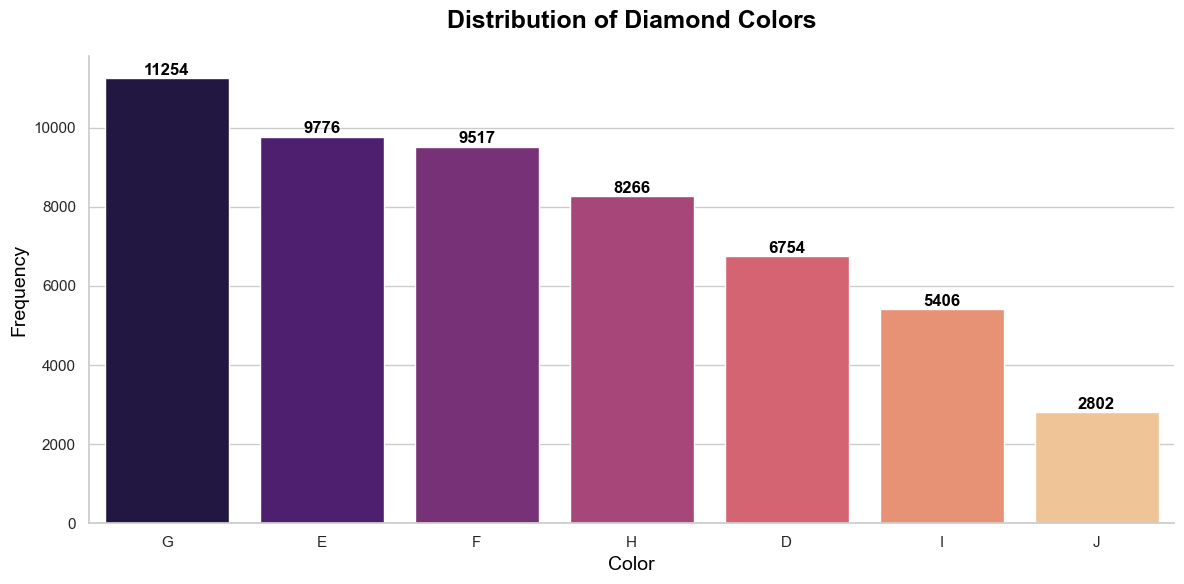

In [11]:



color_counts = diamond_df['color'].value_counts()

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x=color_counts.index, y=color_counts.values, palette='magma')

plt.title("Distribution of Diamond Colors", fontsize=18, weight='bold', color='black', pad=20)
plt.xlabel("Color", fontsize=14, color='black')
plt.ylabel("Frequency", fontsize=14, color='black')

for i, value in enumerate(color_counts.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
sns.despine()

# Show the plot with tight layout
plt.tight_layout()
plt.show()


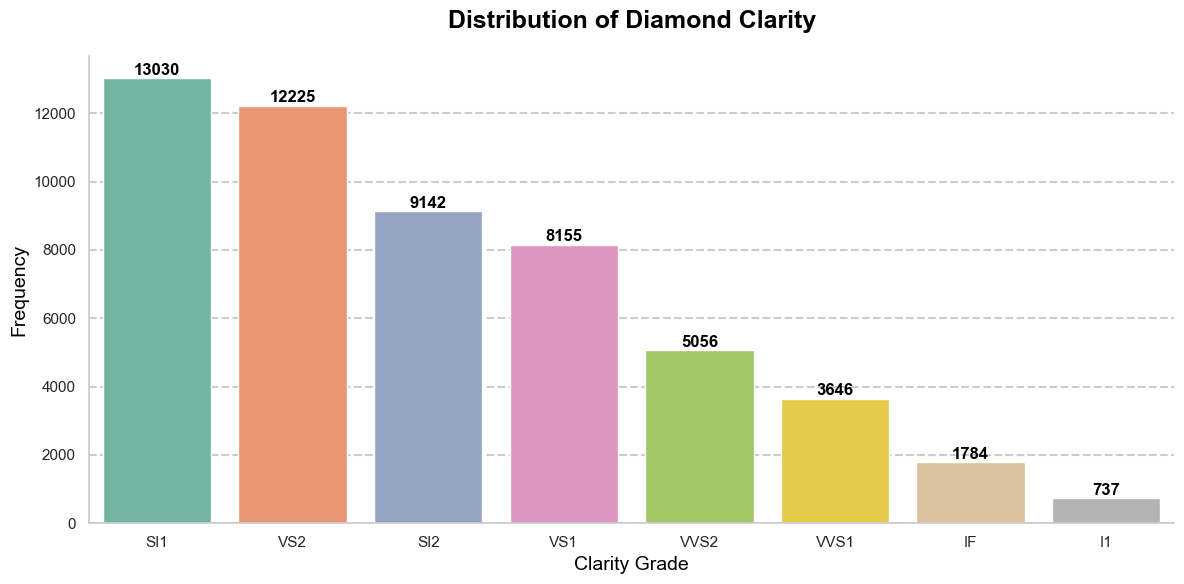

In [12]:

# Calculate the counts of each clarity grade
clarity_counts = diamond_df['clarity'].value_counts()

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create the bar plot with a vibrant color palette (Set2)
sns.barplot(x=clarity_counts.index, y=clarity_counts.values, palette='Set2')

# Add title and labels with attractive fonts and formatting
plt.title("Distribution of Diamond Clarity", fontsize=18, weight='bold', color='black', pad=20)
plt.xlabel("Clarity Grade", fontsize=14, color='black')
plt.ylabel("Frequency", fontsize=14, color='black')

# Add value annotations on top of each bar for clarity
for i, value in enumerate(clarity_counts.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Customize grid: Set darker, black grid lines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)

# Remove spines for a cleaner look
sns.despine()

# Show the plot with tight layout
plt.tight_layout()
plt.show()


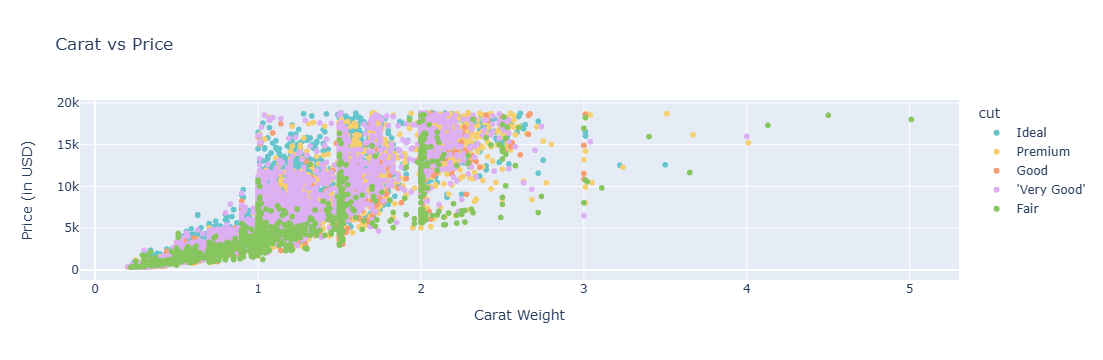

In [13]:
fig = px.scatter(diamond_df, 
                 x='carat', 
                 y='price', 
                 title='Carat vs Price', 
                 color='cut', 
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title='Carat Weight', yaxis_title='Price (in USD)', showlegend=True)
fig.show()

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shoai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

<Figure size 1200x1000 with 0 Axes>

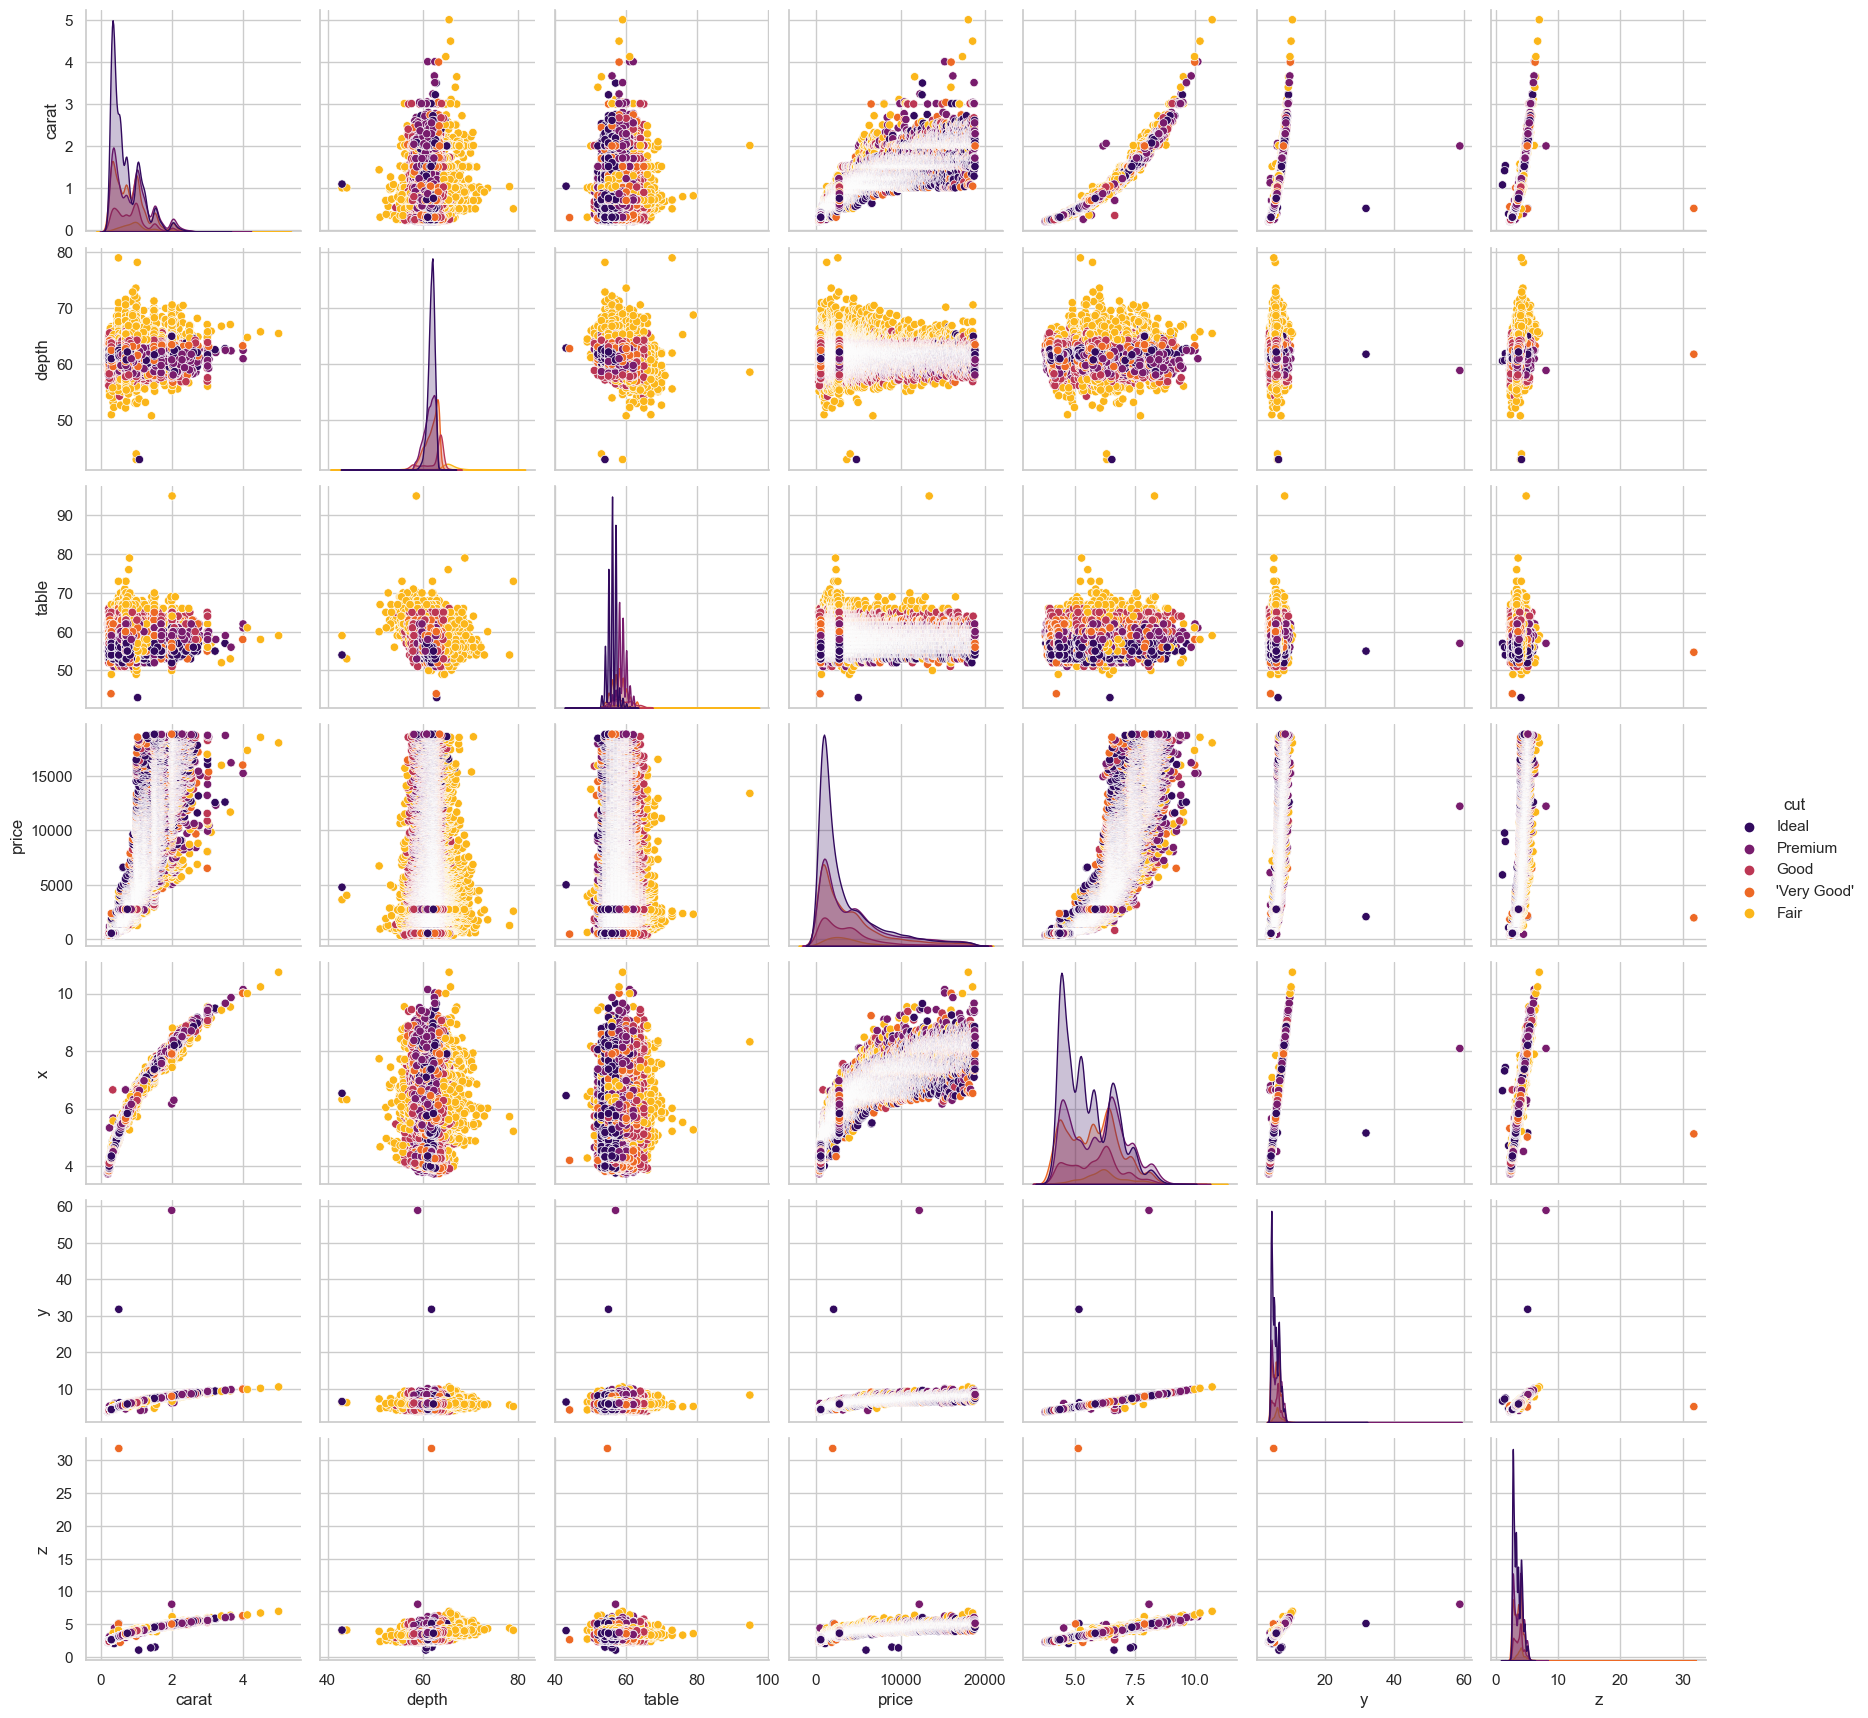

In [14]:
# Set the size of the plot
plt.figure(figsize=(12, 10))
sns.pairplot(diamond_df , hue='cut', palette='inferno')
plt.show()

In [15]:
# Get all categorical columns
categorical_columns = diamond_df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:",categorical_columns)

Categorical variables: Index(['cut', 'color', 'clarity'], dtype='object')


In [16]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a dictionary to store mappings
label_mappings = {}

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    # Fit and transform the column with LabelEncoder
    diamond_df[column] = label_encoder.fit_transform(diamond_df[column])
    
    # Store the mapping of each categorical value to the numeric value
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Check the result
diamond_df.head()

diamond_df.shape

(53775, 10)

In [17]:

# Print the mappings for each categorical column
for column, mapping in label_mappings.items():
    print(f"\nMapping for {column}:")
    print(mapping)


Mapping for cut:
{"'Very Good'": 0, 'Fair': 1, 'Good': 2, 'Ideal': 3, 'Premium': 4}

Mapping for color:
{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

Mapping for clarity:
{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [18]:
diamond_df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [19]:
numeric_columns = diamond_df.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))

print("Outliers detected in each column:")
print(outliers.sum())

diamond_df_no_outliers = diamond_df[~outliers.any(axis=1)]
print("\nOriginal DataFrame size:", diamond_df.shape)
print("DataFrame size after removing outliers:", diamond_df_no_outliers.shape)

diamond_df_no_outliers = diamond_df_no_outliers.reset_index(drop=True)

Outliers detected in each column:
carat    1867
depth    2523
table     603
price    3520
x          24
y          22
z          29
dtype: int64

Original DataFrame size: (53775, 10)
DataFrame size after removing outliers: (47412, 10)


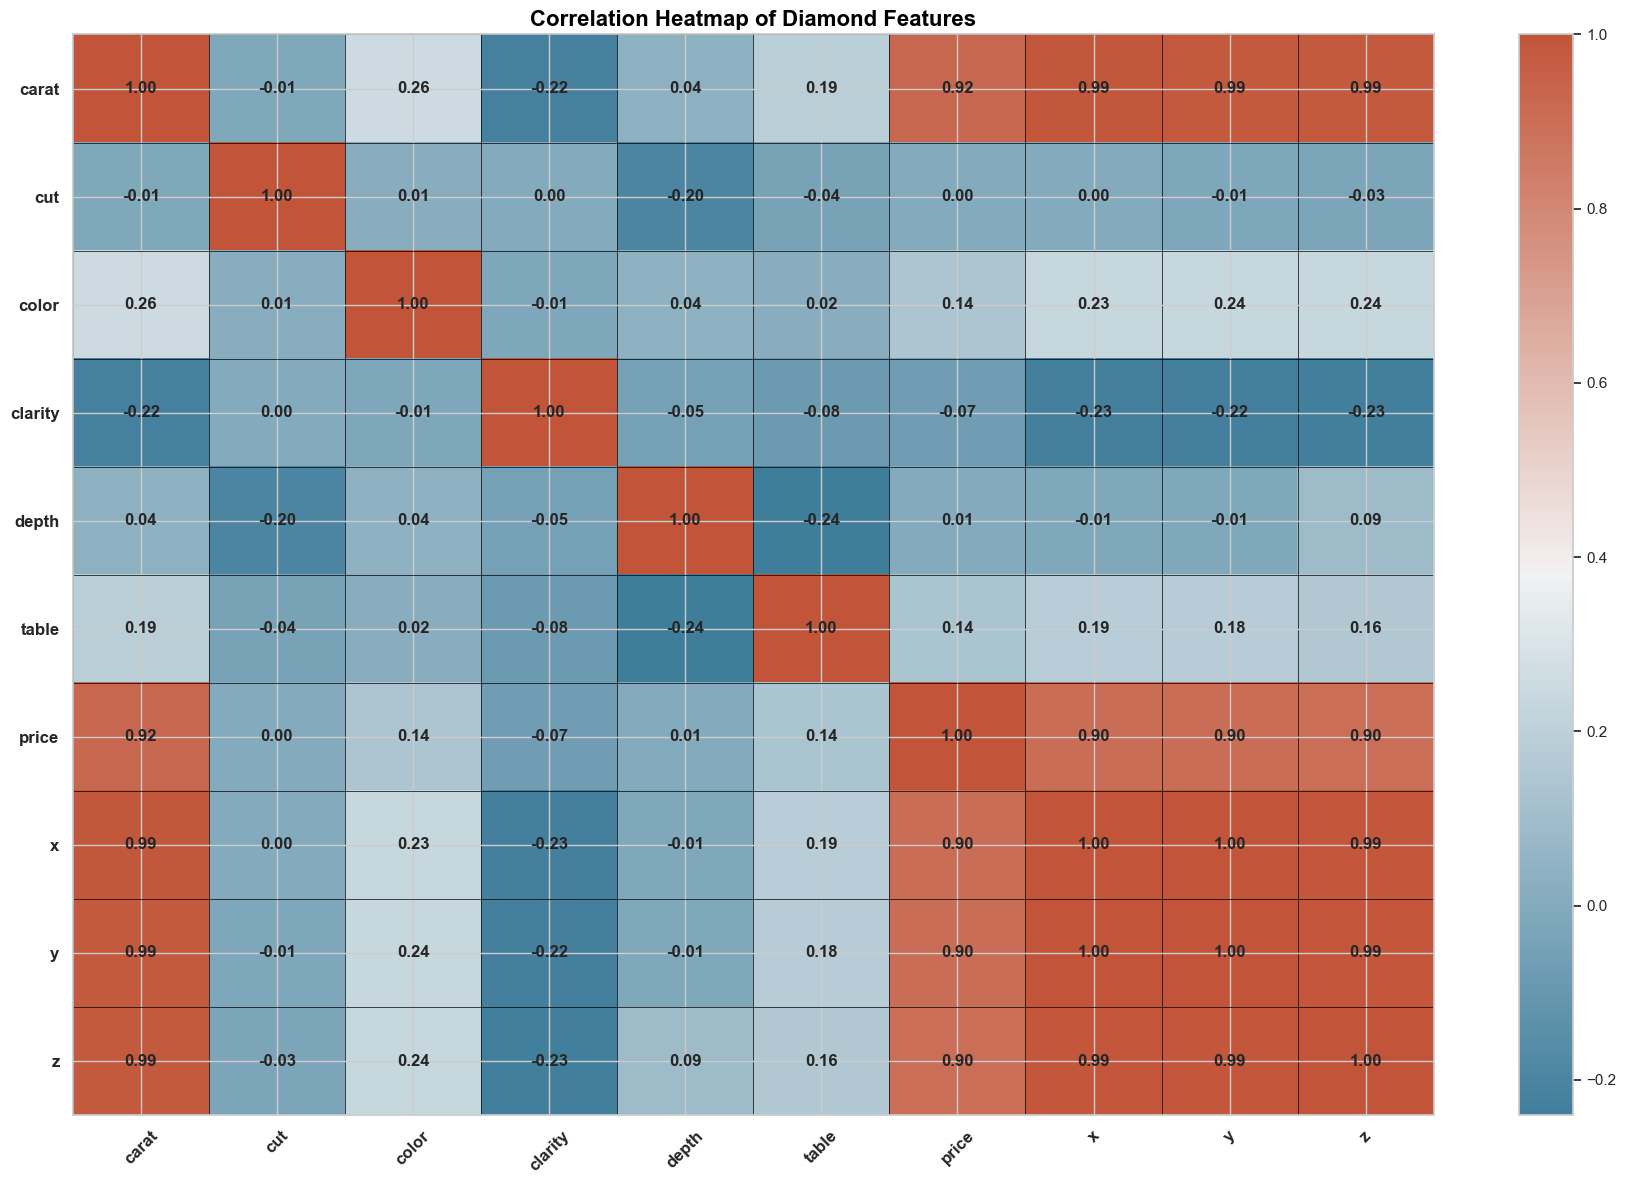

In [20]:

correlation_matrix = diamond_df_no_outliers.corr()
# create the heatmap
plt.figure(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)  
plt.imshow(correlation_matrix, cmap=cmap, aspect="auto")

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", fontsize=12, fontweight="bold")
plt.xticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns, rotation=45, fontsize=12, fontweight="bold")
plt.yticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns, fontsize=12, fontweight="bold")

# Add gridlines for separation
plt.grid(color="black", linestyle="-", linewidth=0.5, which="minor")
plt.gca().set_xticks(np.arange(-0.5, len(correlation_matrix), 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, len(correlation_matrix), 1), minor=True)
plt.gca().tick_params(which="minor", size=0)  

# adding a color bar and customize title
plt.colorbar(label="")
plt.title("Correlation Heatmap of Diamond Features", fontsize=16, fontweight="bold", color="black")
plt.tight_layout()
plt.show()


In [21]:
# Separate features (X) and target variable (y)
X = diamond_df_no_outliers.drop(columns=['price'])  # Drop the target column
y = diamond_df_no_outliers['price']                 # Target column

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the sizes of the splits
print("X-Training Features Shape:", X_train.shape)
print("X-Testing Features Shape:", X_test.shape, "\n")
print("Y-Training Target Shape:", y_train.shape)
print("Y-Testing Target Shape:", y_test.shape)


X-Training Features Shape: (37929, 9)
X-Testing Features Shape: (9483, 9) 

Y-Training Target Shape: (37929,)
Y-Testing Target Shape: (9483,)


In [22]:
print("Columns in X_train (Features):")
print(", ".join(X_train.columns))  
print("\nColumn in y_train (Target):")
print(y_train.name) 

Columns in X_train (Features):
carat, cut, color, clarity, depth, table, x, y, z

Column in y_train (Target):
price


In [23]:

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
#  Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Train the model
rf_model.fit(X_train, y_train)

# getting the R score for testing data
test_score_rf = rf_model.score(X_test, y_test)

# Predict the target variable for test data
y_test_pred_rf = rf_model.predict(X_test)

# calculate performance metrics
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

#  detailed performance evaluation
print("\nRandom Forest Regressor Model Performance:")
print(f"Testing R-squared Score: {test_score_rf:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae_rf:.3f}")
print(f"Mean Squared Error (MSE): {test_mse_rf:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_rf:.3f}")


Random Forest Regressor Model Performance:
Testing R-squared Score: 0.9828
Mean Absolute Error (MAE): 196.218
Mean Squared Error (MSE): 130350.555
Root Mean Squared Error (RMSE): 361.041


In [26]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
test_score_dt = dt_model.score(X_test, y_test)
y_test_pred_dt = dt_model.predict(X_test)

test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_rmse_dt = np.sqrt(test_mse_dt)

print("\nDecision Tree Regressor Model Performance:")
print(f"Testing R-squared Score: {test_score_dt:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae_dt:.3f}")
print(f"Mean Squared Error (MSE): {test_mse_dt:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_dt:.3f}")



Decision Tree Regressor Model Performance:
Testing R-squared Score: 0.9674
Mean Absolute Error (MAE): 262.657
Mean Squared Error (MSE): 246371.413
Root Mean Squared Error (RMSE): 496.358


In [27]:

# KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  

knn_model.fit(X_train, y_train)
test_score_knn = knn_model.score(X_test, y_test)

y_test_pred = knn_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("\nK-Nearest Neighbors Regressor Model Performance:")
print(f"Testing R-squared Score: {test_score_knn:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.3f}")
print(f"Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")


K-Nearest Neighbors Regressor Model Performance:
Testing R-squared Score: 0.9626
Mean Absolute Error (MAE): 292.660
Mean Squared Error (MSE): 282773.003
Root Mean Squared Error (RMSE): 531.764


In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

# Test model performance
test_score_knn = best_knn.score(X_test, y_test)
y_test_pred = best_knn.predict(X_test)

# Performance metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("\nK-Nearest Neighbors Regressor Model Performance After Tuning:")
print(f"Testing R-squared: {test_score_knn:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.3f}")
print(f"Mean Squared Error (MSE): {test_mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.3f}")



K-Nearest Neighbors Regressor Model Performance After Tuning:
Testing R-squared: 0.9709
Mean Absolute Error (MAE): 259.878
Mean Squared Error (MSE): 219891.277
Root Mean Squared Error (RMSE): 468.926


In [30]:
# parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None] 
}
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

#  model to the data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# model after tuning
best_dt_model = grid_search.best_estimator_

# Get the R-squared score for the best model on the test data
test_score_dt = best_dt_model.score(X_test, y_test)

# Predict the target variable for test data
y_test_pred_dt_tuned = best_dt_model.predict(X_test)

# Calculate performance metrics
test_mae_dt_tuned = mean_absolute_error(y_test, y_test_pred_dt_tuned)
test_mse_dt_tuned = mean_squared_error(y_test, y_test_pred_dt_tuned)
test_rmse_dt_tuned = np.sqrt(test_mse_dt_tuned)


print("\nTuned Decision Tree Regressor Model Performance:")
print(f"Testing R-squared Score: {test_score_dt:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae_dt_tuned:.3f}")
print(f"Mean Squared Error (MSE): {test_mse_dt_tuned:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse_dt_tuned:.3f}")



Tuned Decision Tree Regressor Model Performance:
Testing R-squared Score: 0.9762
Mean Absolute Error (MAE): 233.577
Mean Squared Error (MSE): 179853.946
Root Mean Squared Error (RMSE): 424.092


C:\Users\shoai\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

